# K Nearest Neighbors

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [17]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [18]:
df.head() 

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

In [19]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

C:\Users\20002890\AppData\Local\Continuum\anaconda3\envs\PXL_SS\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\20002890\AppData\Local\Continuum\anaconda3\envs\PXL_SS\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\20002890\AppData\Local\Continuum\anaconda3\envs\PXL_SS\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\20002890\AppData\Local\Continuum\anaconda3\envs\PXL_SS\lib\site-packages\numpy\core\fromn

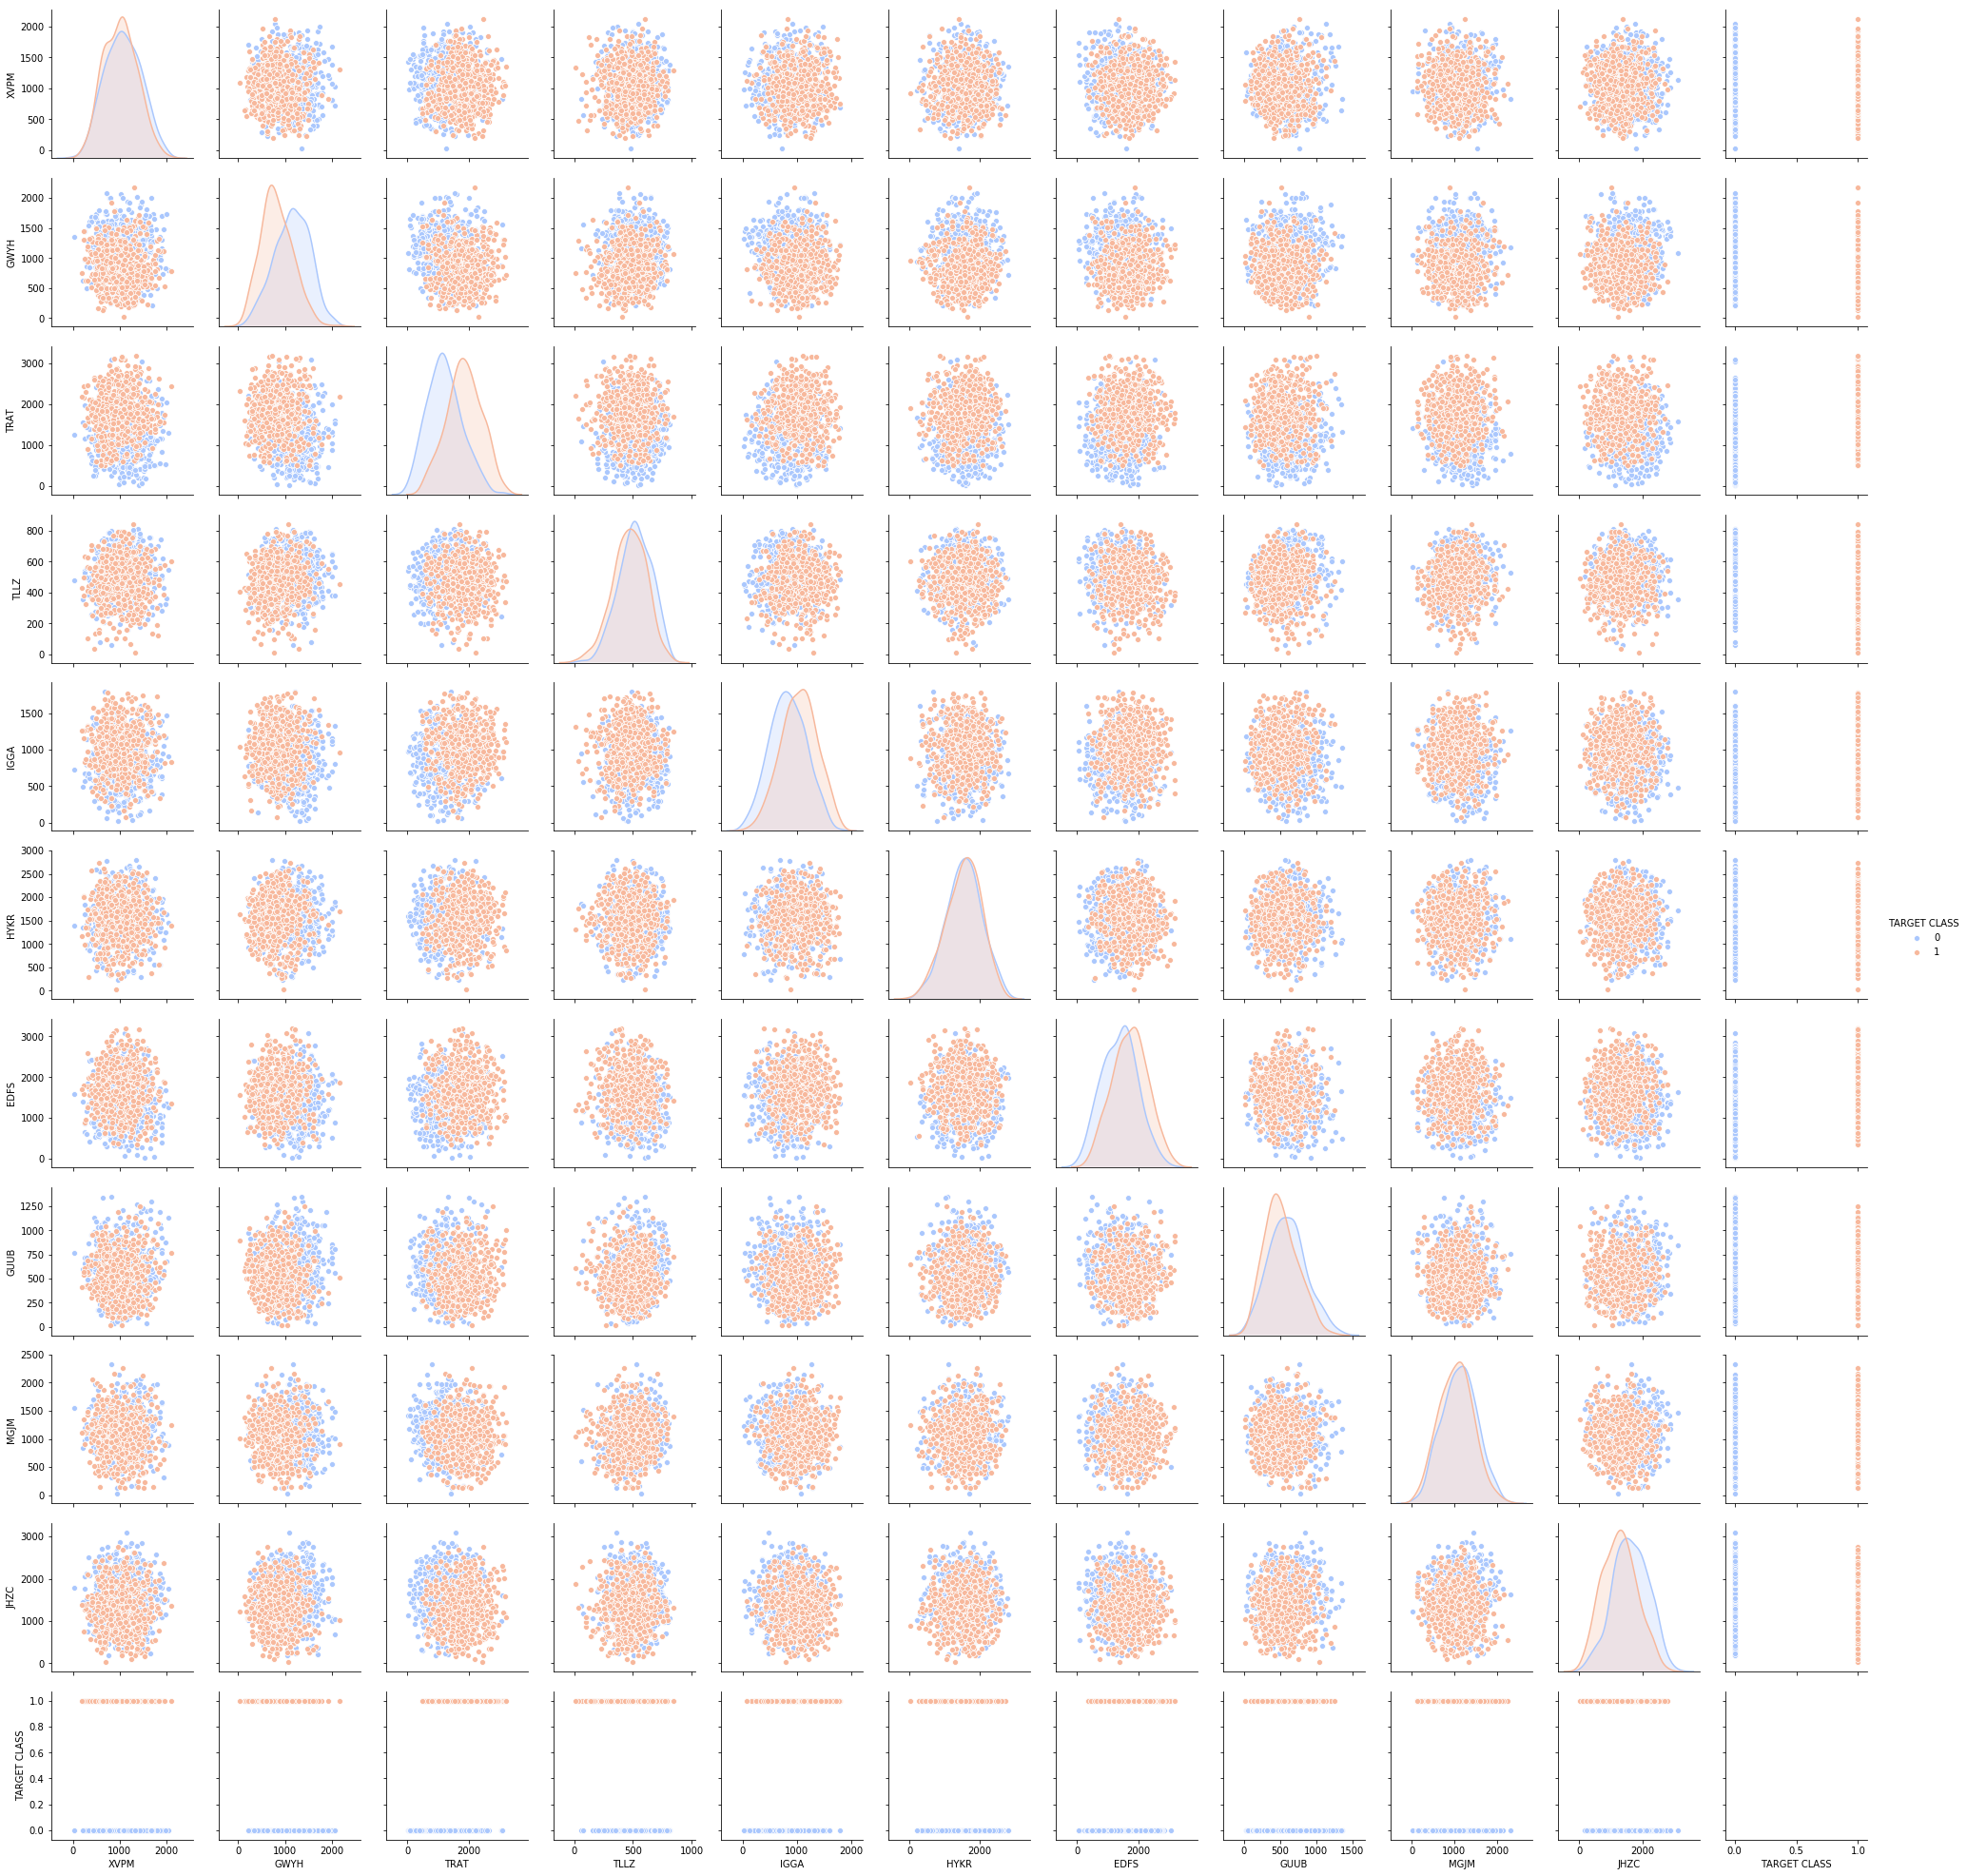

In [6]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Cleaning the data

In [20]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

In [21]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [22]:
df_feat.describe()

XVPM          GWYH          TRAT          TLLZ          IGGA  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   3.019807e-17  1.740830e-16  4.263256e-17  1.438849e-16 -1.589839e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.788339e+00 -2.474303e+00 -2.340083e+00 -3.409927e+00 -2.668575e+00   
25%   -7.757873e-01 -7.574735e-01 -7.293713e-01 -6.538711e-01 -6.936419e-01   
50%   -2.472083e-02 -3.442255e-02 -1.072910e-02  3.566665e-02 -3.590482e-03   
75%    7.308466e-01  7.235137e-01  7.215308e-01  7.386505e-01  6.998930e-01   
max    2.863927e+00  3.009948e+00  2.579241e+00  2.451642e+00  2.465393e+00   

               HYKR          EDFS          GUUB          MGJM          JHZC  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean  -2.788880e-16 -1.687539e-16 -7.815970e-17 -5.115908e-16  1.776357e-17  
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  
min   -3.087121e+00 -2.555607e+00 -2.215822e+00 -2.648319e+00 -2.503543e+00  
25%   -6.718168e-01 -7.168625e-01 -7.266069e-01 -7.136450e-01 -6.921254e-01  
50%    2.911148e-02  8.155695e-03 -8.463946e-02  2.489807e-02 -1.931429e-02  
75%    6.919471e-01  7.032086e-01  6.650219e-01  6.978394e-01  7.253420e-01  
max    2.518753e+00  2.732696e+00  3.198000e+00  3.060964e+00  2.881896e+00

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

# Fit the K Neirest Neighbors model with `k = 1`

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Model evaluation

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[121  31]
 [ 37 111]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       152
           1       0.78      0.75      0.77       148

   micro avg       0.77      0.77      0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



Precision: TP / (TP+FP)  
Recall: TP / (FP+FN)  
f1-score: 2 * (Precision * Recall) /( Precision + Recall)  
support: number of samples  

# K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [28]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting Error Rate vs K value (elbow method)

Text(0, 0.5, 'Error Rate')

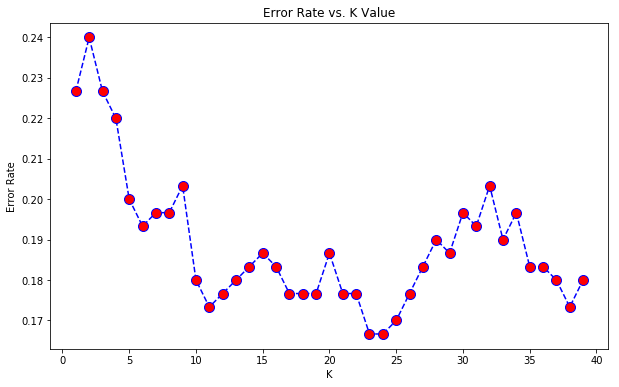

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[130  22]
 [ 32 116]]


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       152
           1       0.84      0.78      0.81       148

   micro avg       0.82      0.82      0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



Precision: TP / (TP+FP)  
Recall: TP / (FP+FN)  
f1-score: 2 * (Precision * Recall) /( Precision + Recall)  
support: number of samples  